In [1]:
# Libraries
suppressPackageStartupMessages({
    library(Seurat)
    library(patchwork)
    library(dplyr)
    library(ggplot2)
    
})

In [2]:
pbmc.data <- Read10X(data.dir = "data/filtered_gene_bc_matrices/hg19/")
pbmc <- CreateSeuratObject(counts = pbmc.data)
pbmc

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
32738 features across 2700 samples within 1 assay 
Active assay: RNA (32738 features, 0 variable features)

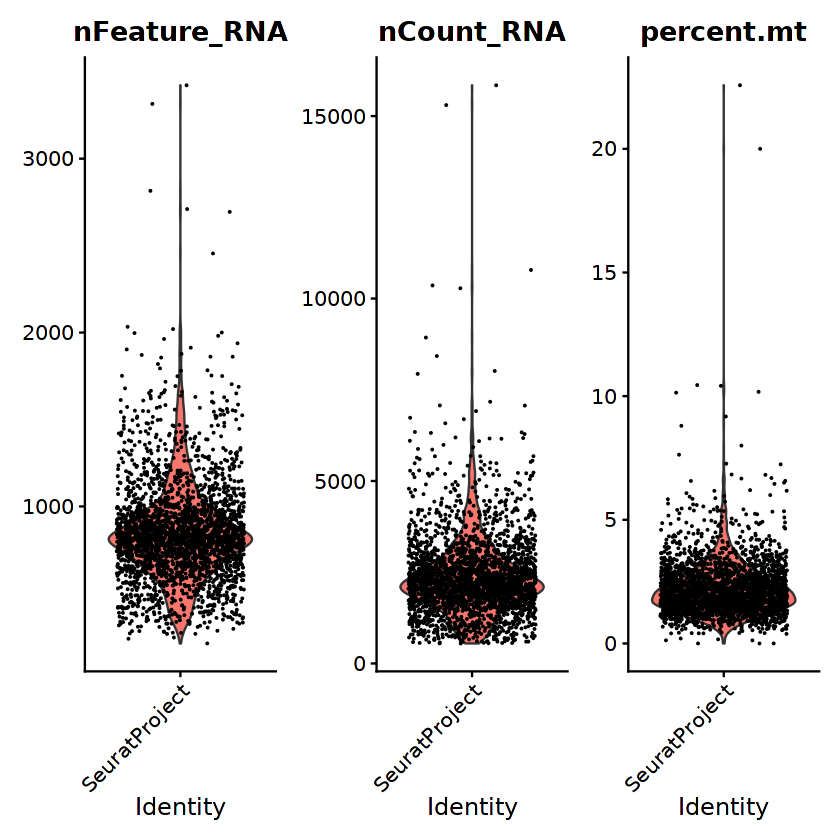

In [3]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

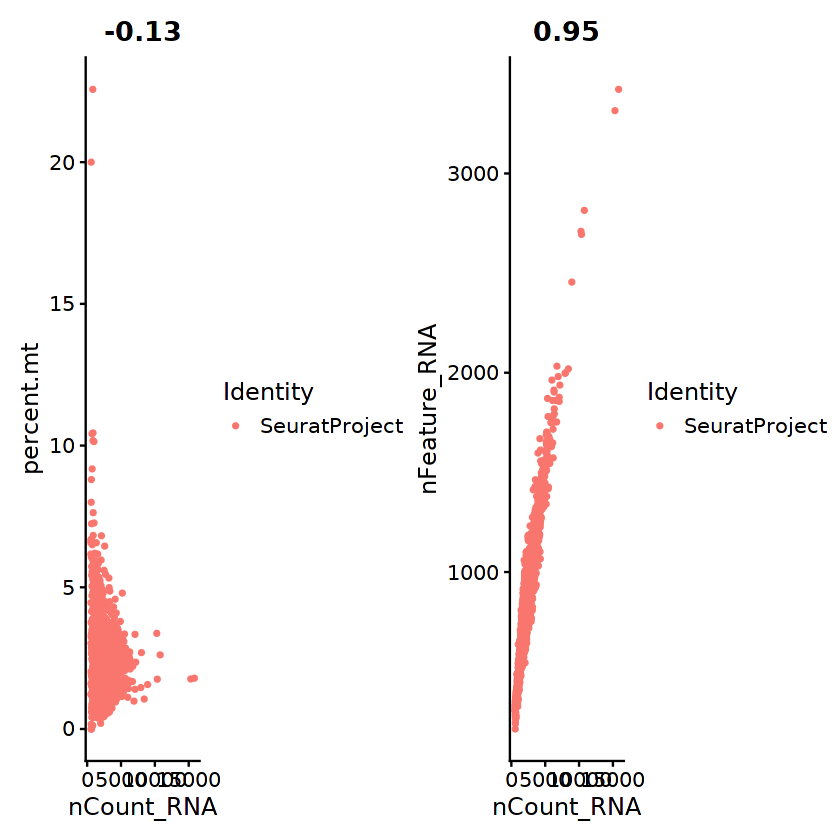

In [4]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [5]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”
ERROR while rich displaying an object: Error in grid.Call(C_convert, x, as.integer(whatfrom), as.integer(whatto), :  ビューポートの次元数がゼロです 

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5

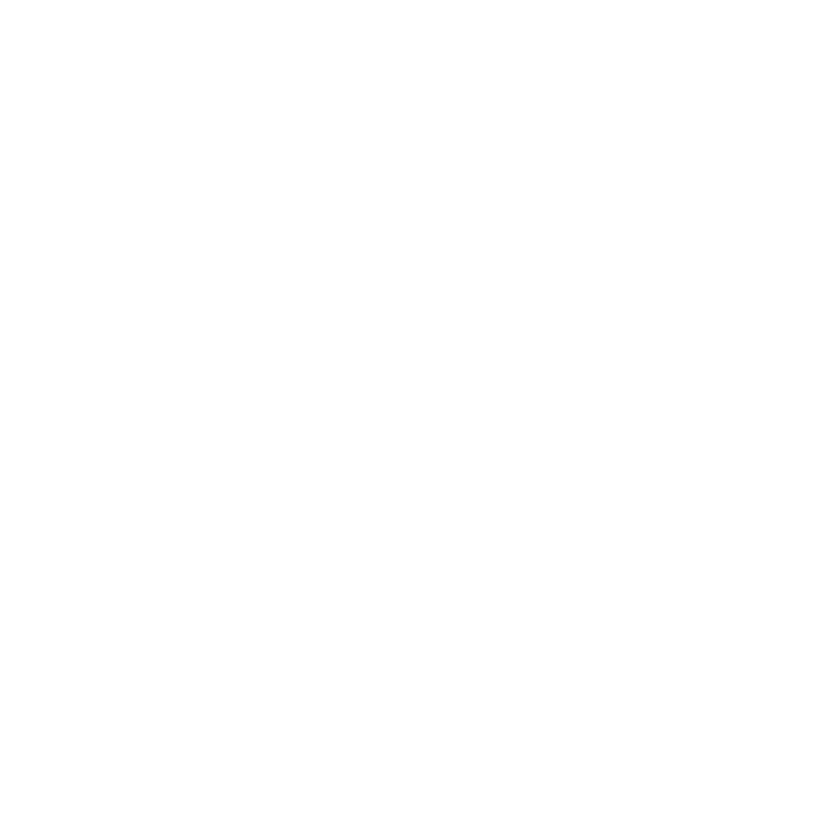

In [6]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [7]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, LGALS3, GSTP1, PYCARD, NCF2 
Negative:  MALAT1, LTB, IL32, CD2, ACAP1, STK17A, CTSW, CD247, CCL5, GIMAP5 
	   AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A, GZMK, MYC, GIMAP7 
	   BEX2, ETS1, LDLRAP1, ZAP70, LYAR, RIC3, TNFAIP8, NKG7, KLRG1, SAMD3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DRA, HLA-DQB1, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DMA, HLA-DQA2, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB, BLNK 
	   KIAA0125, P2RX5, IRF8, IGLL5, SWAP70, ARHGAP24, SMIM14, PPP1R14A, FCRL2, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMA, GZMB, FGFBP2, CTSW, GNLY, GZMH, SPON2 
	   CCL4, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX, CTSC 
	   TTC38, S100A4, ANXA1, IL32, IGFBP7, ID2, ACTB, XCL1, APOBEC3G, SAMD3 
PC_ 3 
Positive:  PPBP, PF4, SDPR, SPARC, GNG11, NRGN, GP

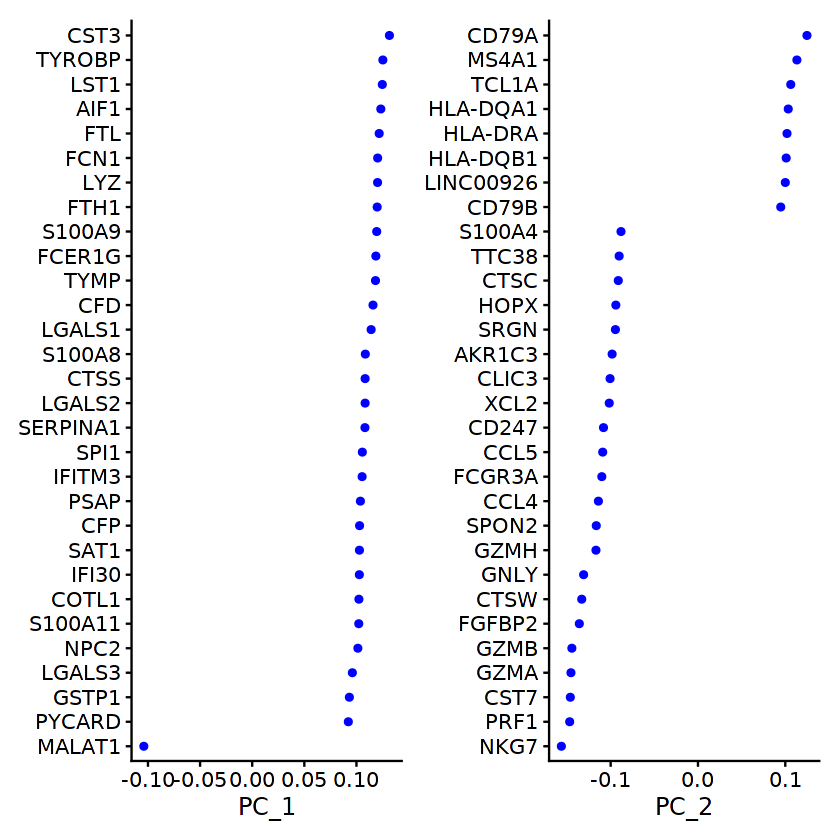

In [8]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

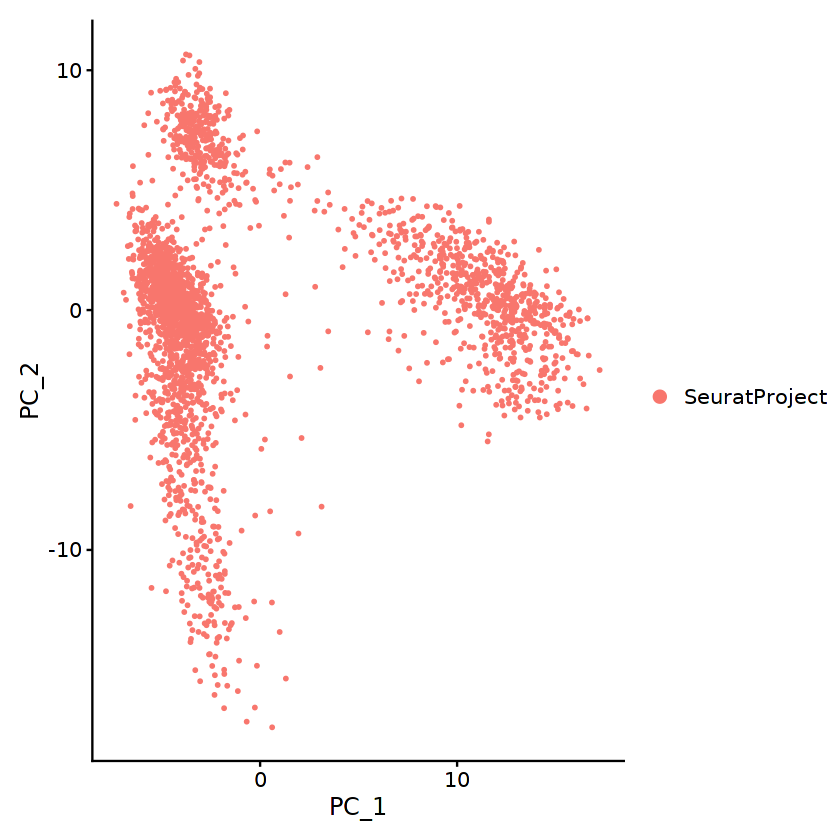

In [9]:
DimPlot(pbmc, reduction = "pca")

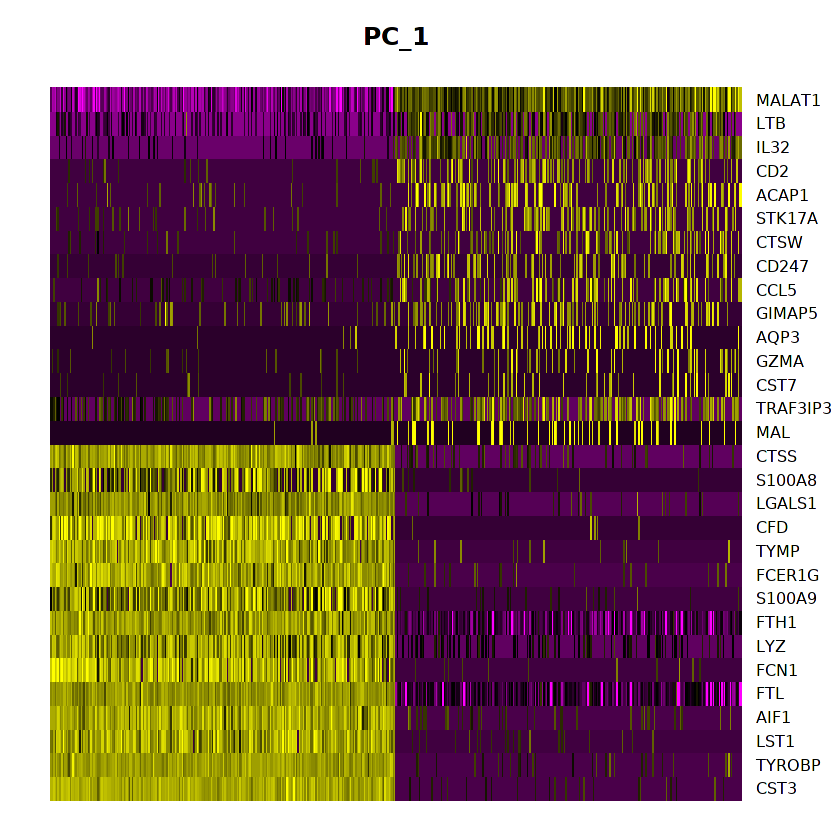

In [10]:
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)

In [11]:
# NOTE: This process can take a long time for big datasets, comment out for expediency. More
# approximate techniques such as those implemented in ElbowPlot() can be used to reduce
# computation time
pbmc <- JackStraw(pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(pbmc, dims = 1:20)

Warning message:
“Removed 23317 rows containing missing values (geom_point).”


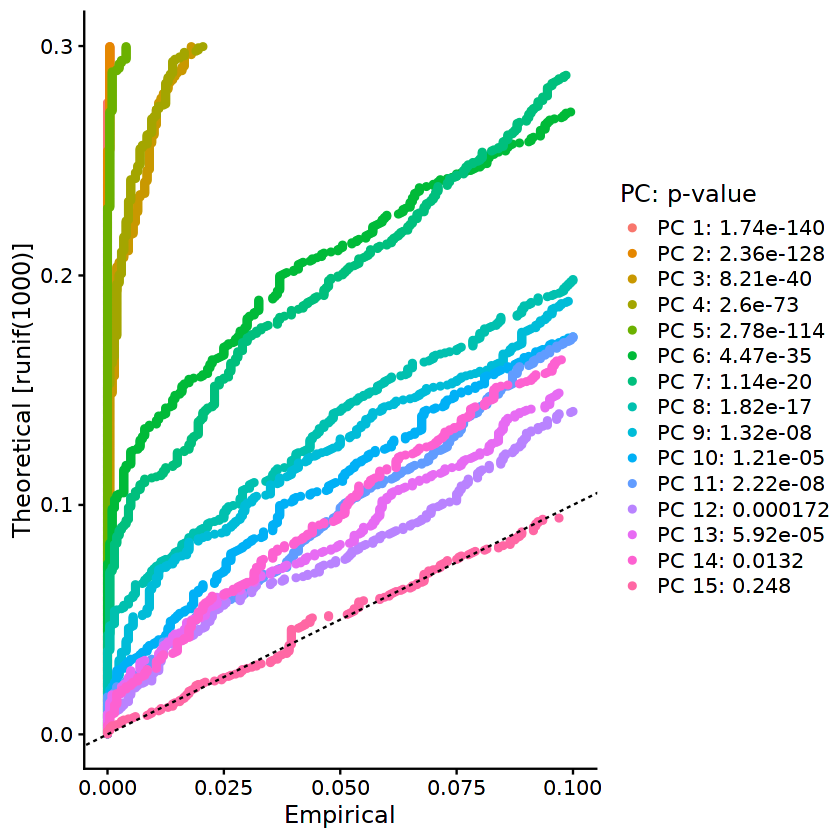

In [12]:
JackStrawPlot(pbmc, dims = 1:15)

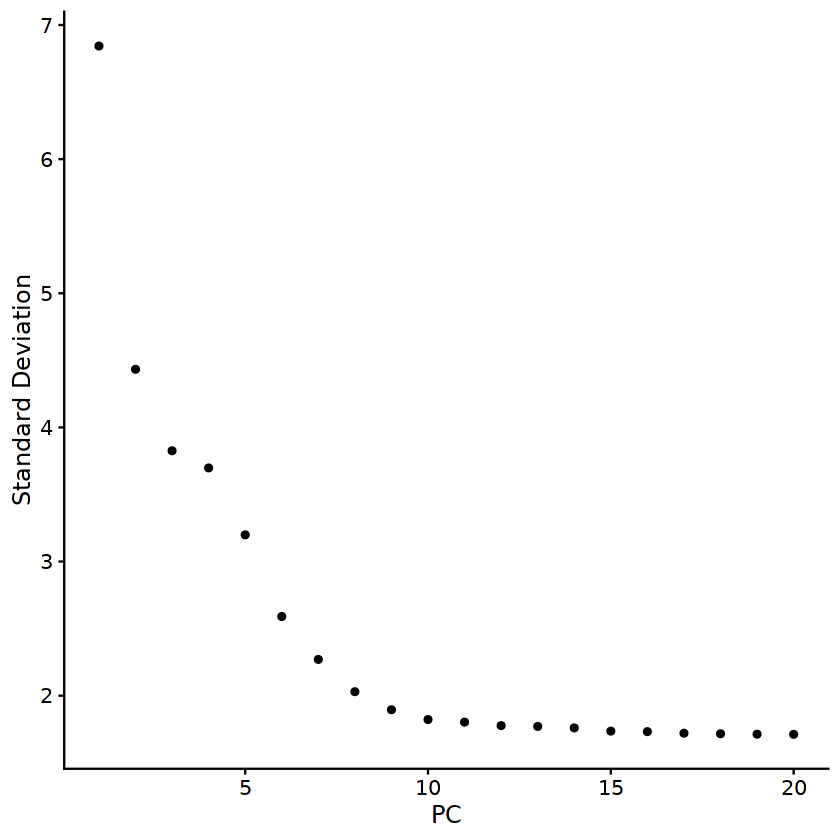

In [13]:
ElbowPlot(pbmc)

In [14]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 98207

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8706
Number of communities: 9
Elapsed time: 0 seconds


In [15]:
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:33:40 UMAP embedding parameters a = 0.9922 b = 1.112

16:33:40 Read 2700 rows and found 10 numeric columns

16:33:40 Using Annoy for neighbor search, n_neighbors = 30

16:33:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:33:41 Writing NN index file to temp file /tmp/RtmpNpICPc/file16fa0453710b3

16:33:41 Searching Annoy index using 1 thread, search_k = 3000

16:33:41 Annoy recall = 100%

16:33:42 Commencing smooth kNN distance calibration using 1 thread

16:33:43 Initializing fr

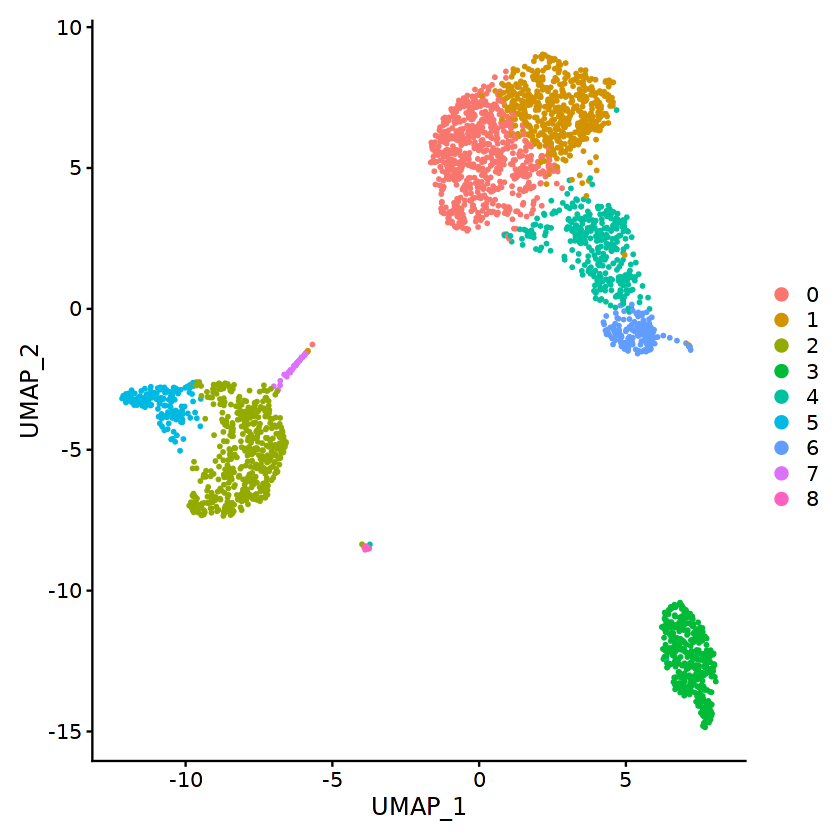

In [16]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(pbmc, reduction = "umap")

### Finding differentially expressed features (cluster biomarkers)

In [17]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(pbmc, ident.1 = 2, min.pct = 0.25)
head(cluster2.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S100A9,0.000000e+00,5.508614,0.994,0.214,0.000000e+00
S100A8,0.000000e+00,5.466329,0.967,0.121,0.000000e+00
FCN1,0.000000e+00,3.429297,0.951,0.147,0.000000e+00
LGALS2,0.000000e+00,3.722491,0.900,0.059,0.000000e+00
CD14,2.662241e-293,2.802286,0.659,0.029,8.715645e-289


In [18]:
# find all markers distinguishing cluster 5 from clusters 0 and 3
cluster5.markers <- FindMarkers(pbmc, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
head(cluster5.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FCGR3A,9.346359e-205,4.297660,0.975,0.037,3.059811e-200
CFD,1.694540e-198,3.487965,0.937,0.030,5.547585e-194
IFITM3,1.036942e-193,3.876402,0.975,0.047,3.394742e-189
RP11-290F20.3,7.907330e-188,2.749243,0.849,0.016,2.588702e-183
CD68,1.235876e-184,2.998178,0.906,0.033,4.046010e-180


In [19]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.640787e-70,1.227324,0.421,0.119,5.371609e-66,0,CCR7
7.060274e-39,1.008952,0.320,0.116,2.311392e-34,0,PRKCQ-AS1
6.430036e-60,1.214625,0.416,0.109,2.105065e-55,1,AQP3
2.472384e-54,1.155359,0.630,0.246,8.094089e-50,1,CD2
0.000000e+00,5.508614,0.994,0.214,0.000000e+00,2,S100A9
0.000000e+00,5.466329,0.967,0.121,0.000000e+00,2,S100A8
0.000000e+00,4.288548,0.934,0.043,0.000000e+00,3,CD79A
8.485045e-274,3.580376,0.619,0.022,2.777834e-269,3,TCL1A
3.117431e-200,3.178506,0.604,0.050,1.020584e-195,4,GZMK


In [20]:
cluster0.markers <- FindMarkers(pbmc, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)

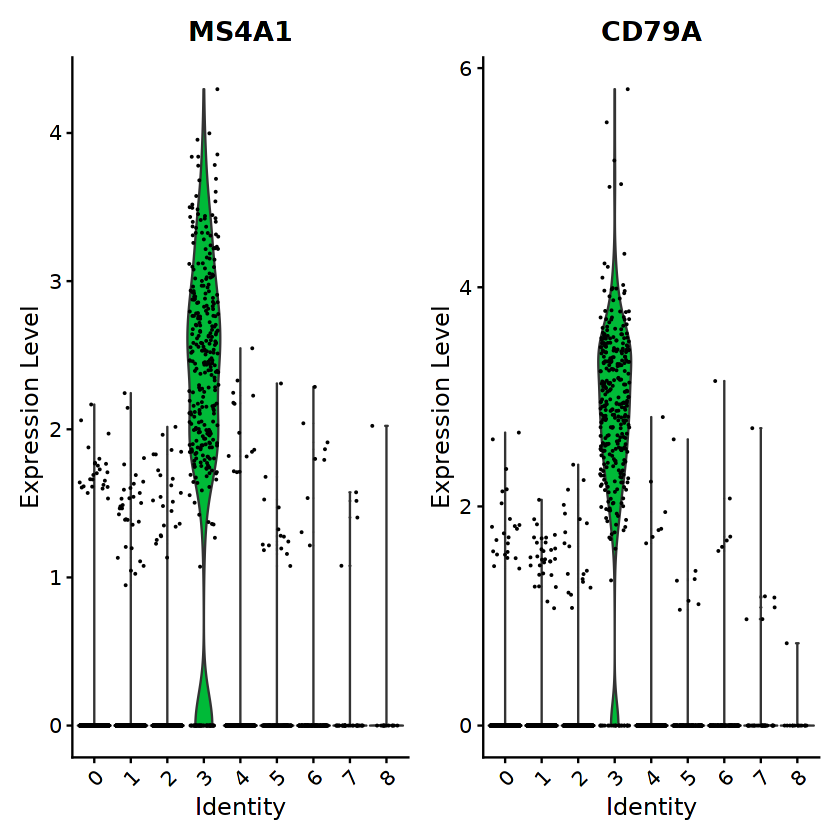

In [21]:
VlnPlot(pbmc, features = c("MS4A1", "CD79A"))

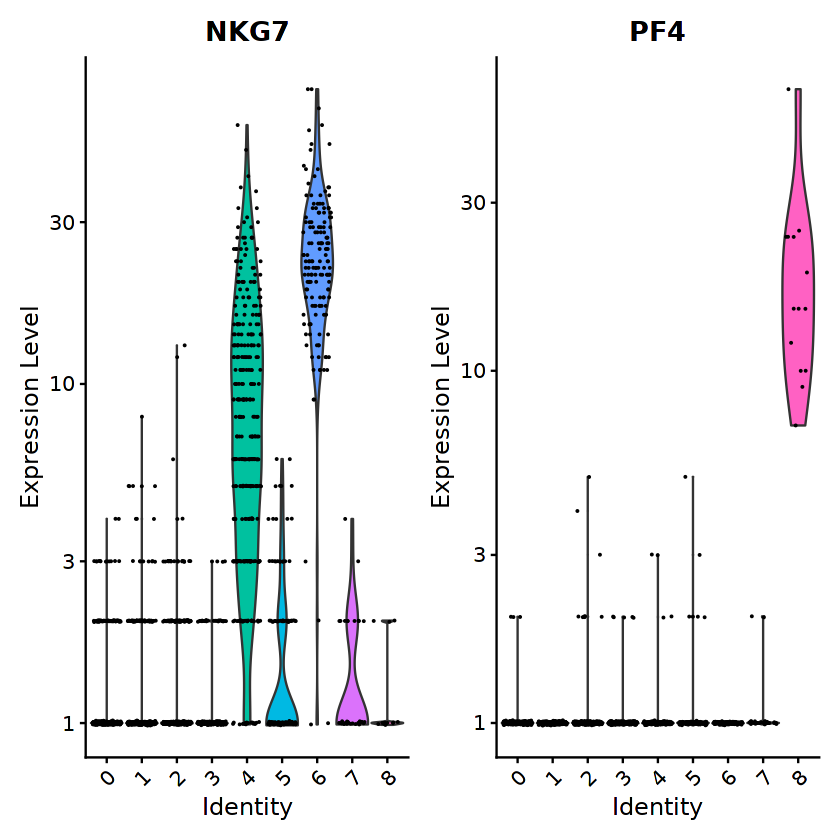

In [22]:
# you can plot raw counts as well
VlnPlot(pbmc, features = c("NKG7", "PF4"), slot = "counts", log = TRUE)

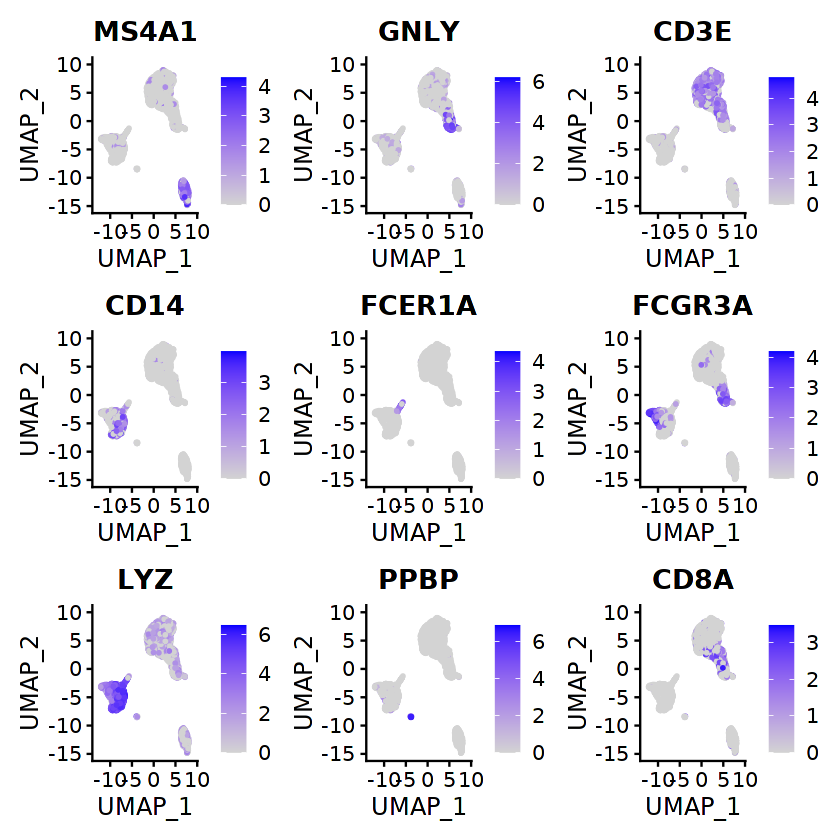

In [23]:
FeaturePlot(pbmc, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP",
    "CD8A"))

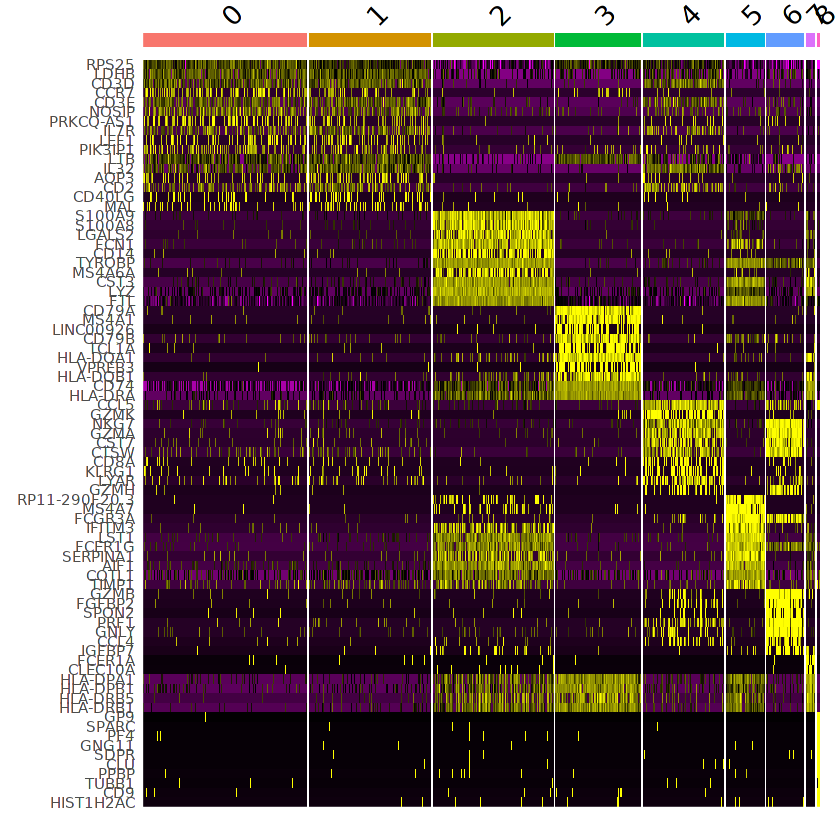

In [24]:
pbmc.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10
DoHeatmap(pbmc, features = top10$gene) + NoLegend()

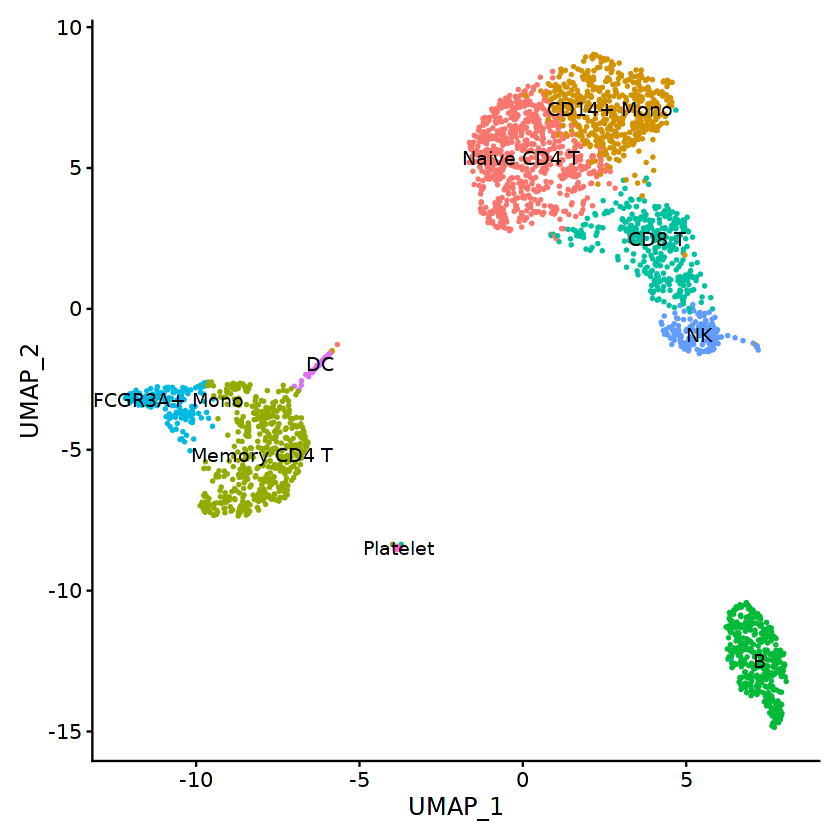

In [25]:
#Assigning cell type identity to clusters
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

# GO enrichment with ClusterProfiler

In [42]:
# Libraries
suppressPackageStartupMessages({
    library("clusterProfiler")
    library("org.Hs.eg.db")
    library("AnnotationHub")
    library(dplyr)
})

In [28]:
# We start with the selected markers

# change the name just to keep the original as backup
so <- pbmc

so.markers <- FindAllMarkers(so, 
                            only.pos = TRUE, 
                            min.pct = 0.1, 
                            logfc.threshold = 0.7)

# Let's visualize some of those genes
so.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)

Calculating cluster Naive CD4 T

Calculating cluster CD14+ Mono

Calculating cluster Memory CD4 T

Calculating cluster B

Calculating cluster CD8 T

Calculating cluster FCGR3A+ Mono

Calculating cluster NK

Calculating cluster DC

Calculating cluster Platelet



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.640787e-70,1.227324,0.421,0.119,5.371609e-66,Naive CD4 T,CCR7
7.060274e-39,1.008952,0.320,0.116,2.311392e-34,Naive CD4 T,PRKCQ-AS1
6.430036e-60,1.214625,0.416,0.109,2.105065e-55,CD14+ Mono,AQP3
2.472384e-54,1.155359,0.630,0.246,8.094089e-50,CD14+ Mono,CD2
0.000000e+00,5.508614,0.994,0.214,0.000000e+00,Memory CD4 T,S100A9
0.000000e+00,5.466329,0.967,0.121,0.000000e+00,Memory CD4 T,S100A8
0.000000e+00,4.288548,0.934,0.043,0.000000e+00,B,CD79A
8.485045e-274,3.580376,0.619,0.022,2.777834e-269,B,TCL1A
4.101288e-211,3.065066,0.958,0.230,1.342680e-206,CD8 T,CCL5


In [29]:
##################################################################
#Subsetting top 100 markers with adjusted p values lower than .05#
##################################################################
top100 <- so.markers %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)
top100pval <- subset(top100, rowSums(top100[5] < 0.05) > 0)

In [30]:
##################################################################
#Subsetting top 150 markers with adjusted p values lower than .05#
##################################################################
top150 <- so.markers %>% group_by(cluster) %>% top_n(n = 150, wt = avg_log2FC)
top150pval <- subset(top150, rowSums(top150[5] < 0.05) > 0)

In [31]:
##################################################################
#Subsetting top 200 markers with adjusted p values lower than .05#
##################################################################
top200 <- so.markers %>% group_by(cluster) %>% top_n(n = 200, wt = avg_log2FC)
top200pval <- subset(top200, rowSums(top200[5] < 0.05) > 0)

In [43]:
# Convert the symbols to ENTREZID (necessary for clusterprofiler)
convertID <- function(list_symbols){
    convertedIDs <- bitr(list_symbols,
                         fromType = "SYMBOL",
                         toType = "ENTREZID",
                         OrgDb = "org.Hs.eg.db",
                         drop = TRUE)
    return(convertedIDs$ENTREZID)
    }

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“4.76% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“4.55% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“3% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“8.33% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“3.85% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in b

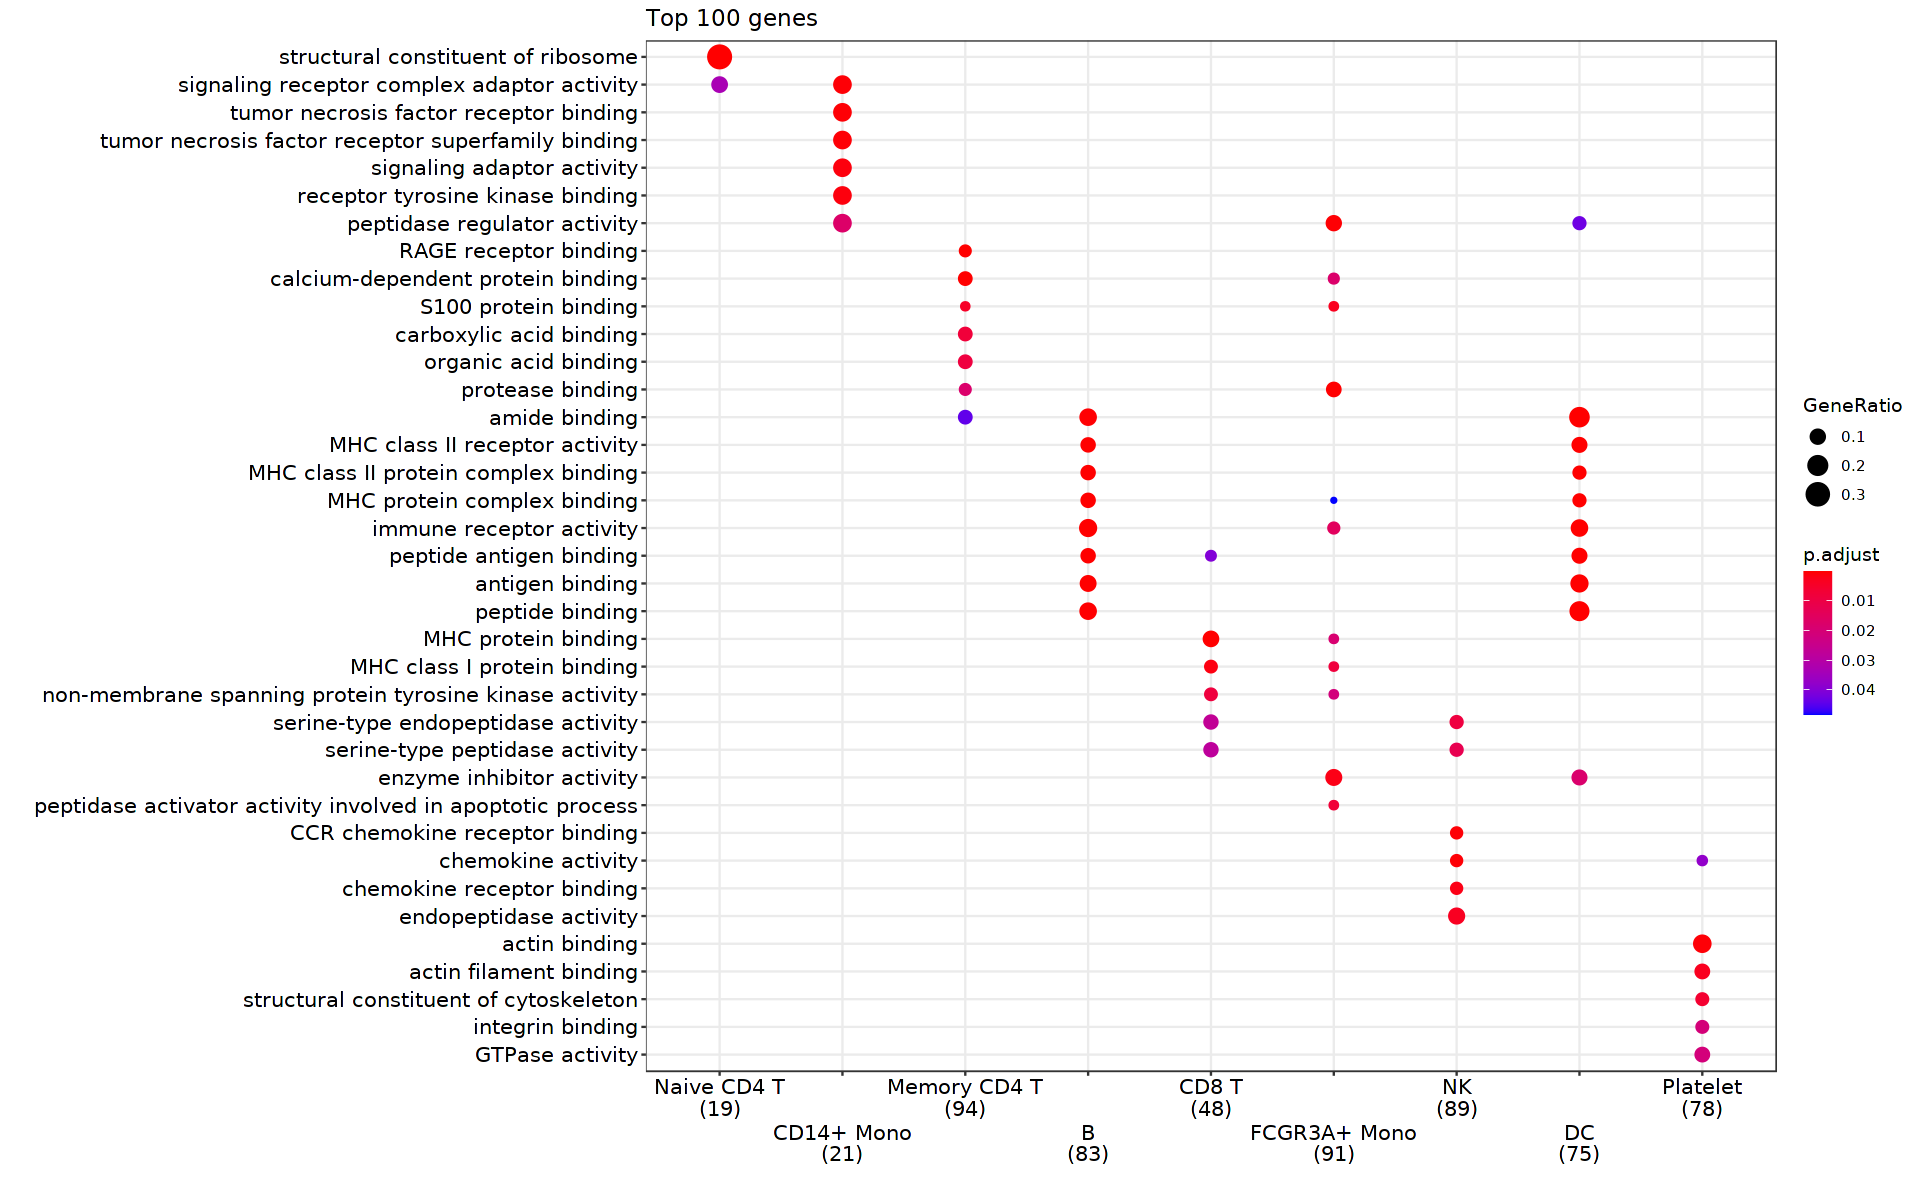

In [48]:
# Run for 100 genes
df <- top100pval[,7:6]
dfsample <- split(df$gene,df$cluster)

df2 <- lapply(dfsample, convertID)

GOclusterplot <- compareCluster(geneCluster = df2, fun = "enrichGO", OrgDb = "org.Hs.eg.db")

options(repr.plot.width = 16, repr.plot.height = 10)
dotplot(GOclusterplot) + 
    scale_x_discrete(guide = guide_axis(n.dodge = 2)) + 
    ggtitle("Top 100 genes")

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“4.76% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“4.55% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“2.67% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“8.04% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“3.85% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message i

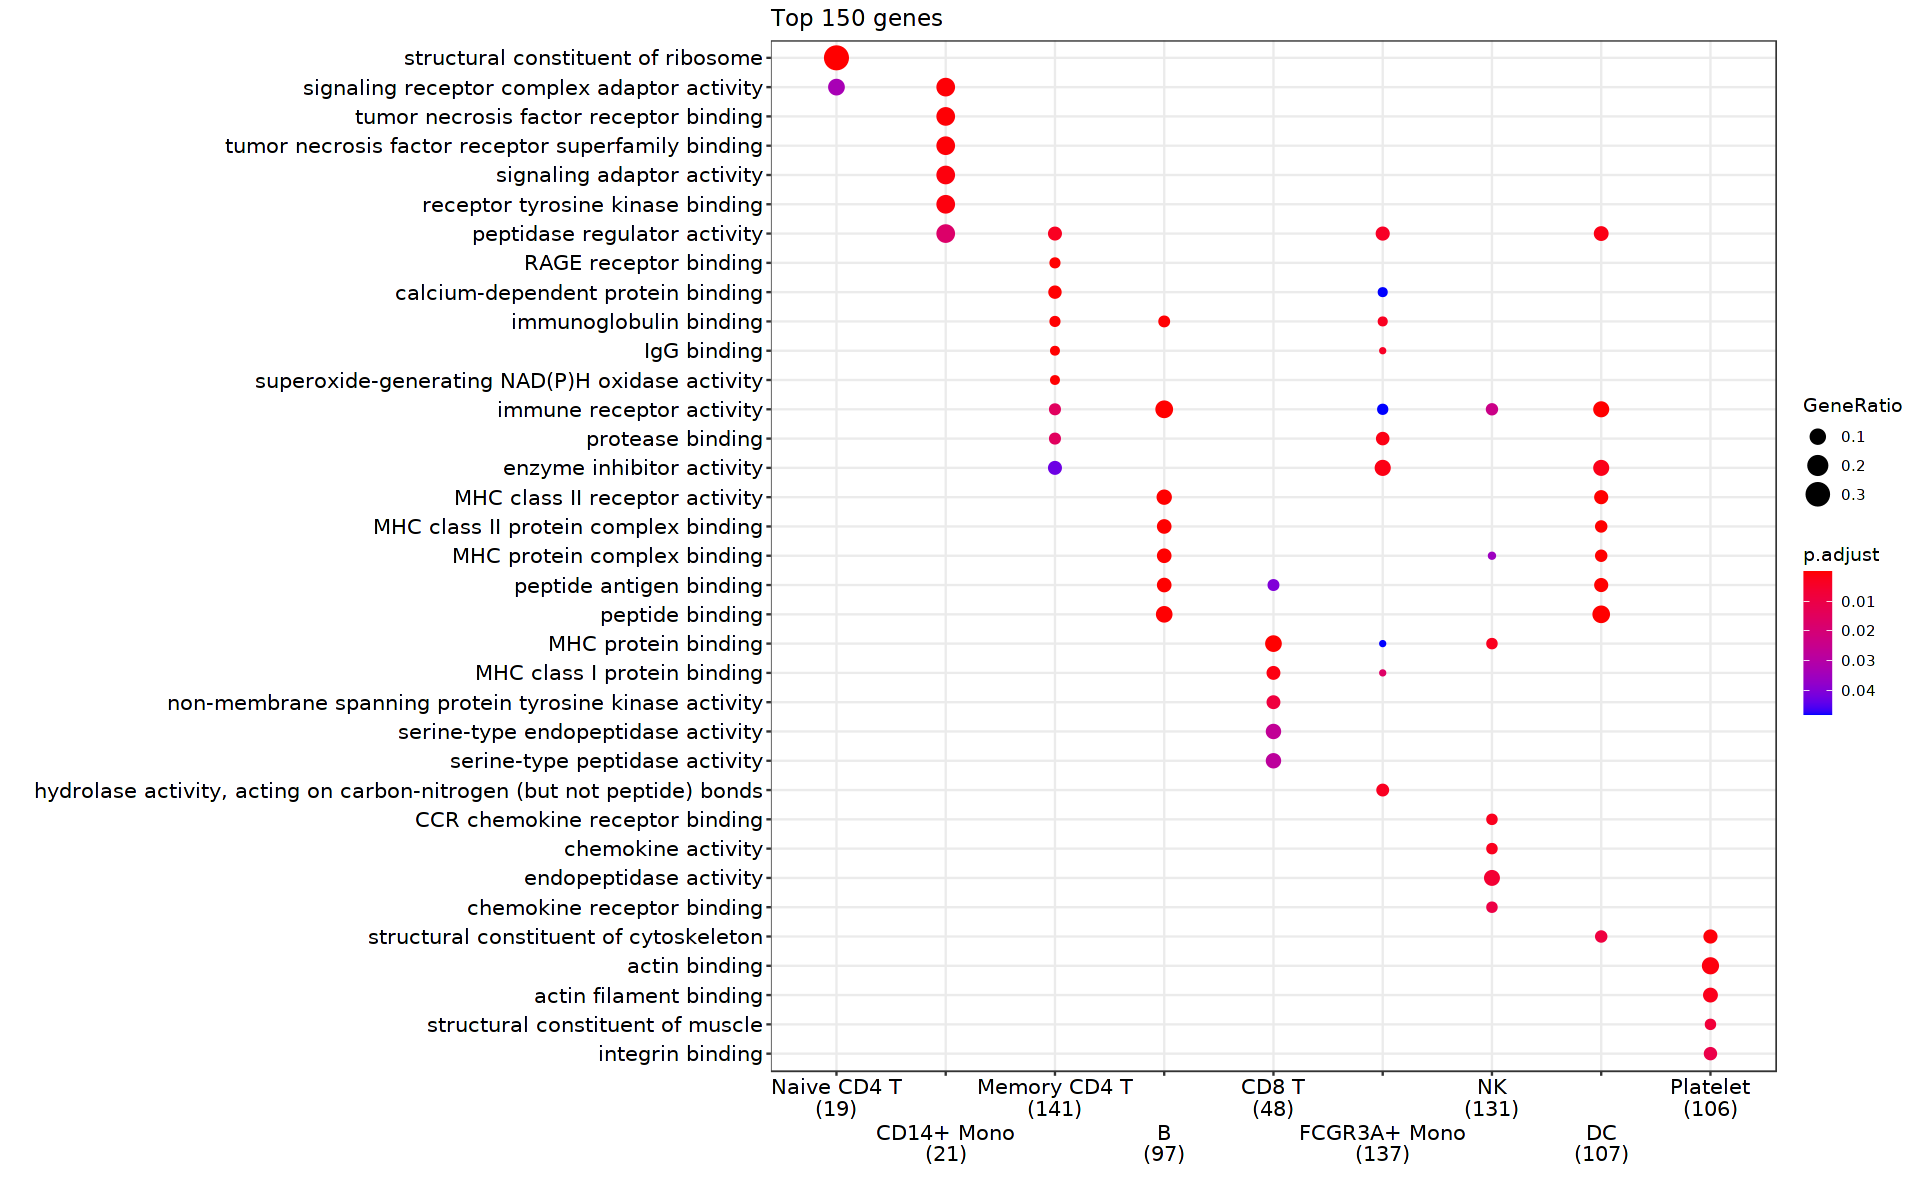

In [49]:
df <- top150pval[,7:6]
dfsample <- split(df$gene,df$cluster)

df2 <- lapply(dfsample, convertID)

GOclusterplot <- compareCluster(geneCluster = df2, fun = "enrichGO", OrgDb = "org.Hs.eg.db")

options(repr.plot.width = 16, repr.plot.height = 10)
dotplot(GOclusterplot) + 
    scale_x_discrete(guide = guide_axis(n.dodge = 2)) + 
    ggtitle("Top 150 genes")

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“4.76% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“4.55% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“5% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“8.04% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“3.85% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in b

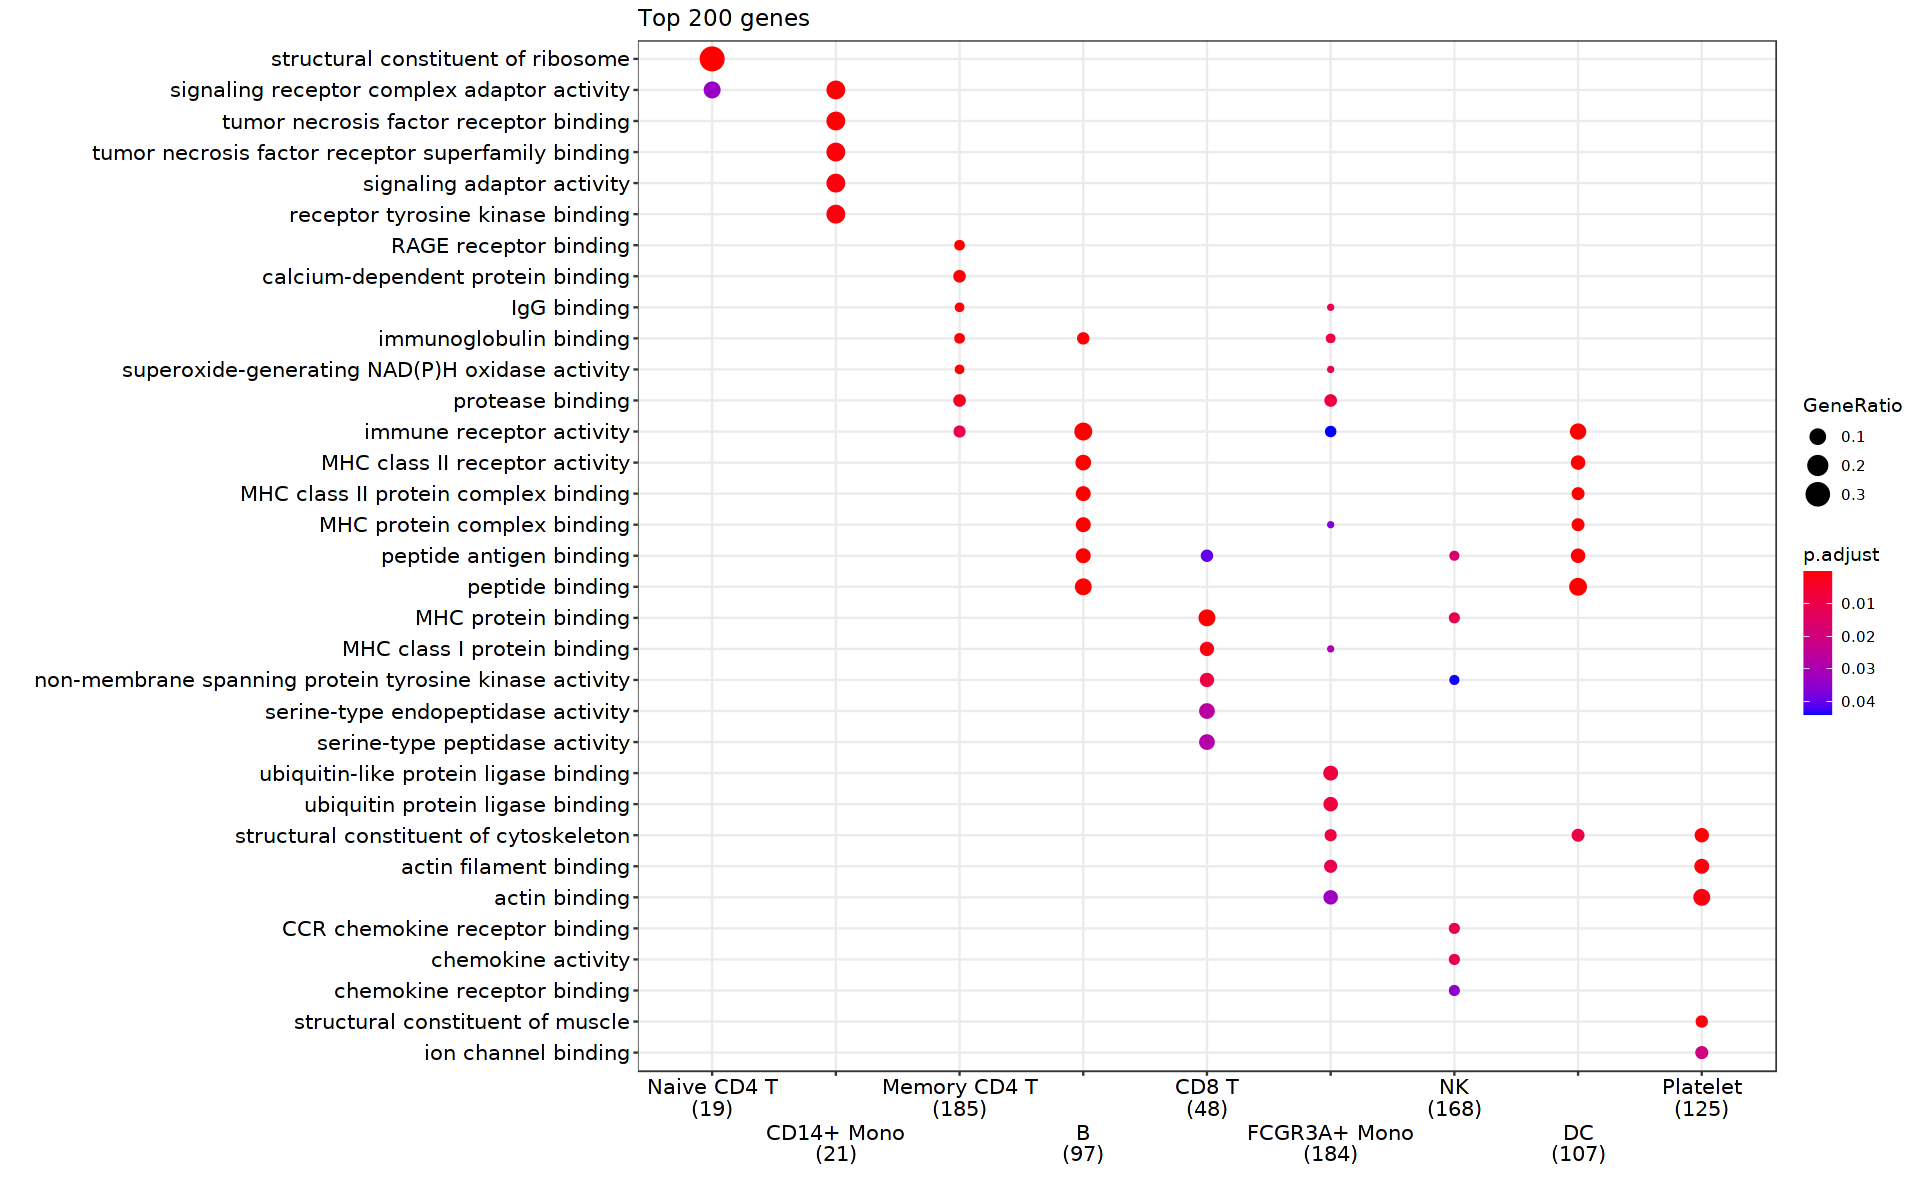

In [50]:
df <- top200pval[,7:6]
dfsample <- split(df$gene,df$cluster)

df2 <- lapply(dfsample, convertID)

GOclusterplot <- compareCluster(geneCluster = df2, fun = "enrichGO", OrgDb = "org.Hs.eg.db")

options(repr.plot.width = 16, repr.plot.height = 10)
dotplot(GOclusterplot) + 
    scale_x_discrete(guide = guide_axis(n.dodge = 2)) + 
    ggtitle("Top 200 genes")

## If you want to compare only two clusters

In [52]:
# search for positive markers
cluster.markers <- FindMarkers(so, 
                        ident.1 = "B", 
                        ident.2 = "NK", 
                        only.pos = TRUE)
cluster.markers <- cluster.markers %>% arrange(desc(avg_log2FC))

# view results
head(cluster.markers, 10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HLA-DRA,2.160027e-71,4.629033,1.000,0.357,7.071496e-67
CD79A,1.141340e-63,4.178079,0.934,0.039,3.736518e-59
HLA-DQA1,2.141780e-58,3.834356,0.885,0.045,7.011759e-54
HLA-DQB1,4.882320e-55,3.720228,0.862,0.052,1.598374e-50
HLA-DRB1,2.484574e-67,3.713800,0.980,0.188,8.133999e-63
CD74,2.338717e-71,3.627563,1.000,0.831,7.656490e-67
TCL1A,2.089493e-33,3.625698,0.619,0.019,6.840583e-29
HLA-DPB1,3.990823e-68,3.612141,0.986,0.338,1.306516e-63
LTB,2.796127e-58,3.335873,0.931,0.240,9.153961e-54


In [53]:
##################################################################
#Subsetting top N markers with adjusted p values lower than .05#
##################################################################

#made a function to run based on N genes
go_func <- function(ngenes){
    topN <- cluster.markers %>% top_n(n = ngenes, wt = avg_log2FC)
    topNpval <- subset(topN, rowSums(topN[5] < 0.05) > 0)

    gene_list <- na.omit(rownames(topNpval))

    # convert to entreID
    gene_list2 <- convertID(gene_list)

    gene_list2 = sort(gene_list2, decreasing = TRUE)
    #length(gene_list2)


    # universe
    all_genes <- na.omit(convertID(rownames(x = so)))
                       
    #length(all_genes)

    ego <- enrichGO(gene = gene_list2, 
             universe = all_genes,
             OrgDb = org.Hs.eg.db,
             ont ="BP", 
             pAdjustMethod = "BH",
             qvalueCutoff  = 0.01,
             pvalueCutoff = 0.05, 
            )
    dotplot(ego) + 
        ggtitle(paste0("Top ",ngenes," genes")) +
        theme(text = element_text(size=20))
}

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“4.69% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“40.12% of input gene IDs are fail to map...”
wrong orderBy parameter; set to default `orderBy = "x"`



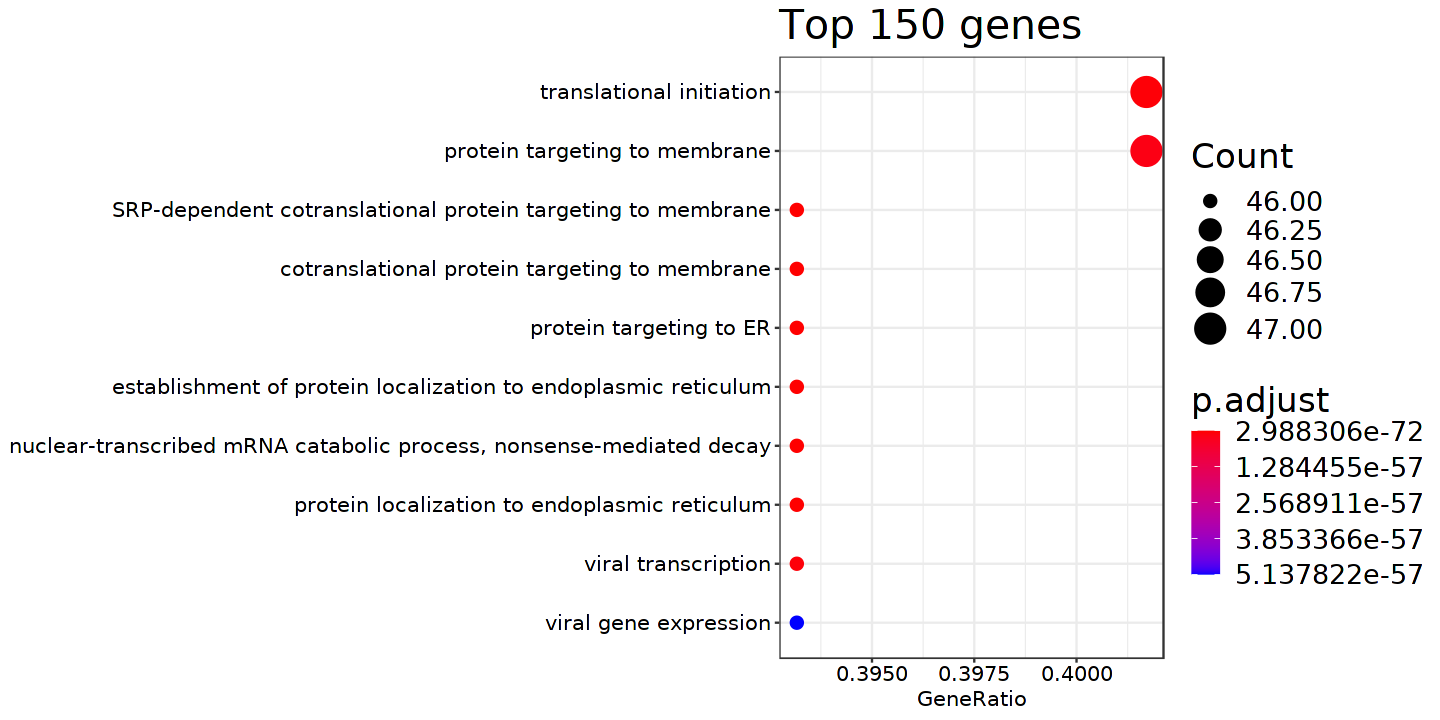

In [54]:
options(repr.plot.width = 12, repr.plot.height = 6)

go_func(150)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“5.37% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“40.12% of input gene IDs are fail to map...”
wrong orderBy parameter; set to default `orderBy = "x"`



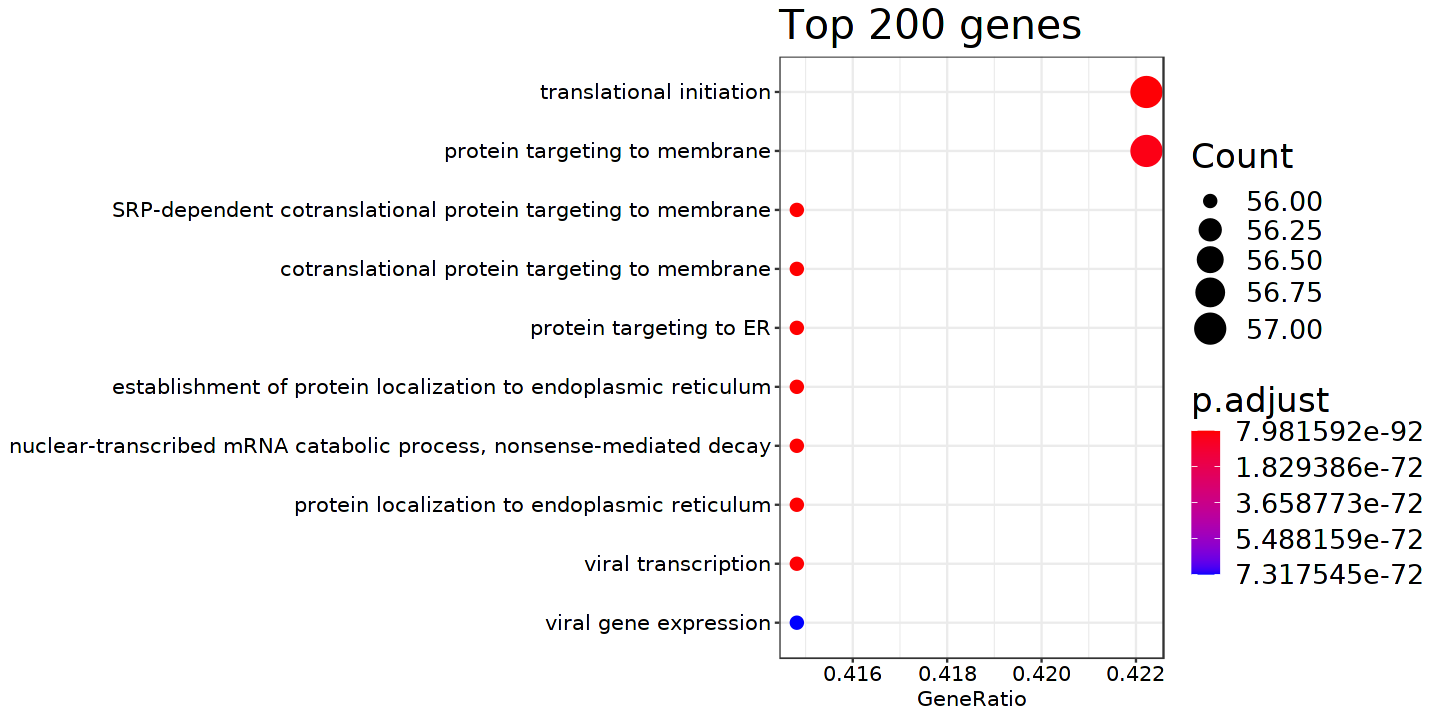

In [55]:
go_func(200)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“4.62% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“40.12% of input gene IDs are fail to map...”
wrong orderBy parameter; set to default `orderBy = "x"`



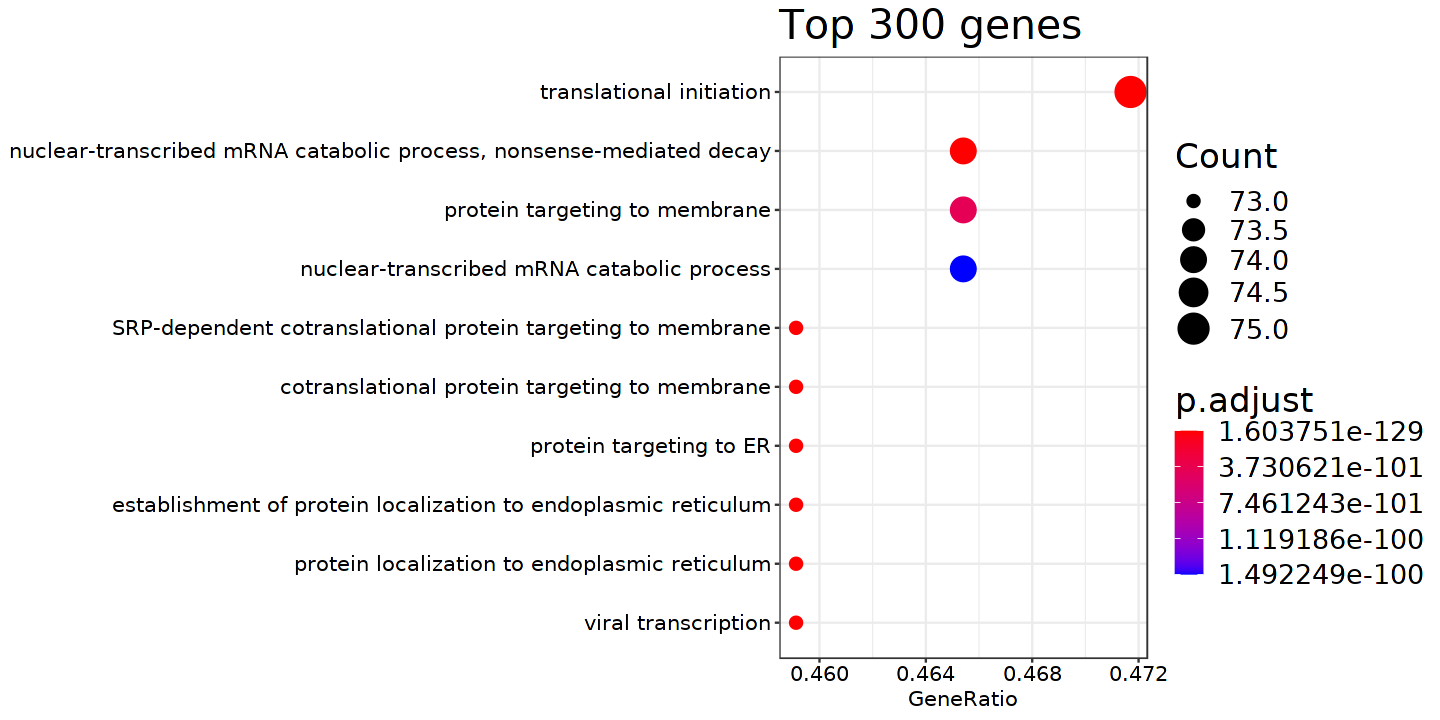

In [56]:
go_func(300)

In [57]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=ja_JP.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=ja_JP.UTF-8        LC_COLLATE=ja_JP.UTF-8    
 [5] LC_MONETARY=ja_JP.UTF-8    LC_MESSAGES=ja_JP.UTF-8   
 [7] LC_PAPER=ja_JP.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=ja_JP.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] org.Hs.eg.db_3.12.0    AnnotationHub_2.22.1   BiocFileCache_1.14.0  
 [4] dbplyr_2.1.1           org.Dm.eg.db_3.12.0    AnnotationDbi_1.52.0  
 [7] IRanges_2.24.1         S4Vectors_0.28.1       Biobase_2.50.0        
[10] BiocGenerics_0.